# Insurance Dataset

This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker, and Region. There are no missing or undefined values in the dataset.

## Inspiration

This relatively simple dataset should be an excellent starting point for:

- Exploratory Data Analytics
- Statistical Analysis
- Hypothesis testing
- Training Linear Regression models for predicting Insurance Premium Charges.

## Proposed Tasks

1. **Exploratory Data Analytics**
2. **Statistical Hypothesis Testing**
3. **Statistical Modeling**
4. **Linear Regression**




Certainly! Below is a structured presentation of the tasks and information you've outlined, organized into a table with numbering for each section.

| Index | Task                                           | Description                                                                                       |
|-------|------------------------------------------------|---------------------------------------------------------------------------------------------------|
| 1     | IMPORT LIBRARY                                 | Import the necessary Python libraries for data analysis and machine learning.                  |
| 2     | LOAD DATASET                                   | Load the insurance dataset into a DataFrame.                                                      |
| 3     | EXPLORATORY DATA ANALYSIS (EDA)                | Perform exploratory data analysis to understand the dataset.                                      |
| 3.1   | UNIVARIATE                                     | Analyze individual variables.                                                                     |
| 3.1.1 | Skewness Summary                               | Compute and summarize skewness for each numerical variable.                                       |
| 3.2   | HYPOTHESIS TESTING                             | Conduct hypothesis testing to make statistical inferences.                                        |
| 3.2.1 | Two Sample t Test                              | Perform a two-sample t-test for relevant comparisons.                                              |
| 3.2.2 | ANOVA                                          | Apply analysis of variance (ANOVA) for comparing means across multiple groups.                   |
| 3.2.3 | Correlation Analysis                           | Conduct correlation analysis between variables.                                                    |
| 3.2.3.1 | Pearson Correlation                          | Compute Pearson correlation coefficients.                                                        |
| 3.2.3.2 | Spearman Rank Correlation                   | Calculate Spearman rank correlation coefficients.                                                |
| 3.3   | BIVARIATE                                      | Explore relationships between pairs of variables.                                                  |
| 3.4   | MULTIVARIATE                                   | Explore relationships involving multiple variables.                                               |
| 4     | MODEL                                          | Build machine learning models.                                                                    |
| 4.1   | LINEAR REGRESSION                              | Implement linear regression models.                                                               |
| 4.1.1 | Encode User-Defined Function                   | Define a function for encoding categorical variables.                                             |
| 4.1.2 | Train-Test Split                               | Split the dataset into training and testing sets.                                                |
| 4.1.3 | Pipeline                                       | Create a pipeline for preprocessing and modeling.                                                |
| 4.1.4 | Train Data                                     | Train the linear regression model on the training data.                                           |
| 4.1.4.1 | Evaluate Metrics (Train Data)               | Evaluate performance metrics (MSE, RMSE, MAE, R2) on the training data.                            |
| 4.1.5 | Test Data                                      | Evaluate the linear regression model on the test data.                                            |
| 4.1.5.1 | Evaluate Metrics (Test Data)                | Evaluate performance metrics (MSE, RMSE, MAE, R2) on the test data.                               |
| 4.2   | APPLIED POLYNOMIAL                             | Apply polynomial regression to capture non-linear relationships.                                   |
| 4.2.1 | Train Data (Polynomial)                        | Train the polynomial regression model on the training data.                                        |
| 4.2.1.1 | Evaluate Metrics (Train Data - Polynomial) | Evaluate performance metrics (MSE, RMSE, MAE, R2) on the training data (polynomial regression).  |
| 4.2.2 | Test Data (Polynomial)                         | Evaluate the polynomial regression model on the test data.                                        |
| 4.2.2.1 | Evaluate Metrics (Test Data - Polynomial)  | Evaluate performance metrics (MSE, RMSE, MAE, R2) on the test data (polynomial regression).     |
| 4.3   | OVERCOME OVERFITTING                           | Implement techniques to overcome overfitting.                                                    |
| 4.3.1 | LASSO                                          | Apply Lasso regression to introduce regularization.                                              |
| 4.3.2 | RIDGE                                          | Apply Ridge regression to introduce regularization.                                              |

The table provides a clear structure for your tasks, allowing you to follow a systematic workflow through different stages of data analysis and modeling.

#IMPORT LIBRARY

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr, spearmanr

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# LOAD DATASET

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/prashantsundge/US-Health-Insurance/main/DATA/insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- removed 1 duplicate values from dataset

In [6]:
data.drop_duplicates(inplace =True)

In [7]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


# EXPLORATOR DATA ANALYSIS

## UNIVARIATE

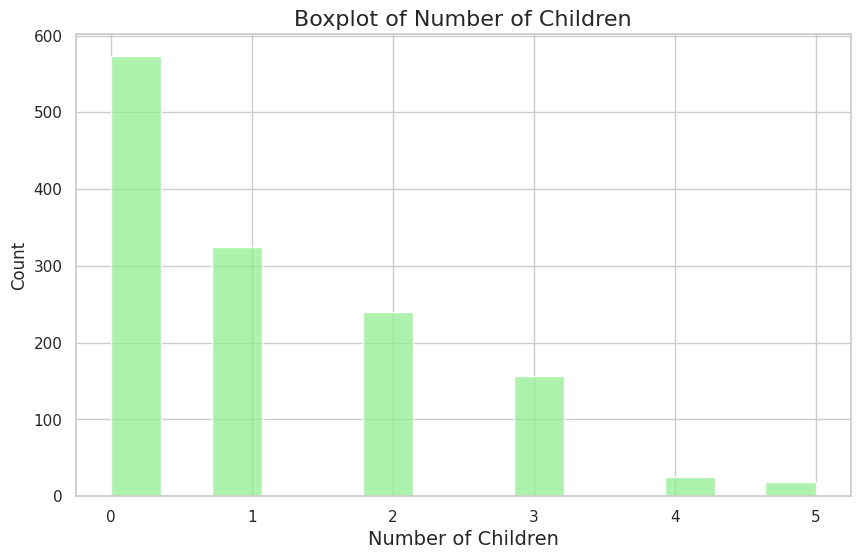

In [8]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot the boxplot
sns.histplot(x=data['children'], color='lightgreen')

# Add title and labels
plt.title('Boxplot of Number of Children', fontsize=16)
plt.xlabel('Number of Children', fontsize=14)

# Show the plot
plt.show()

mostly all the insurance family as only 2 child max but only 1 family has 5 childern

In [9]:
data['children'].value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

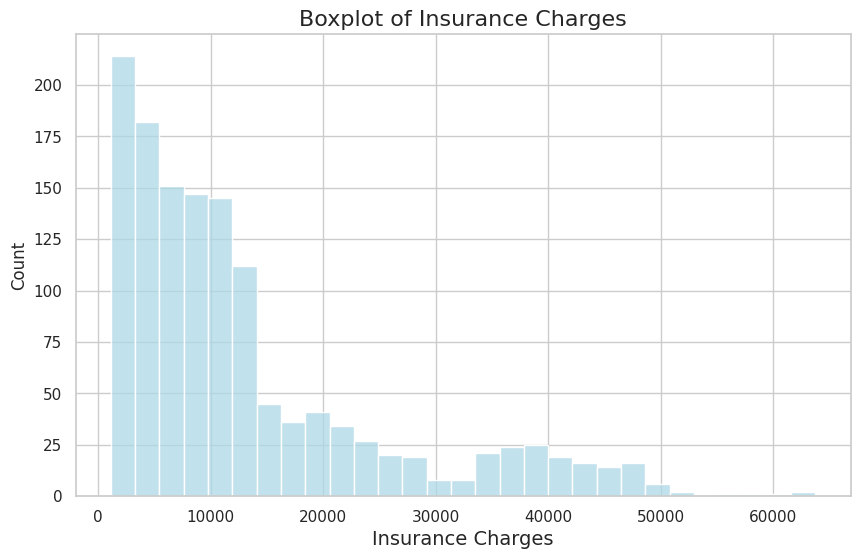

In [10]:
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot the boxplot
sns.histplot(x=data['charges'], color='lightblue')

# Add title and labels
plt.title('Boxplot of Insurance Charges', fontsize=16)
plt.xlabel('Insurance Charges', fontsize=14)

# Show the plot
plt.show()

- charges has outliers
- this is right skewed data

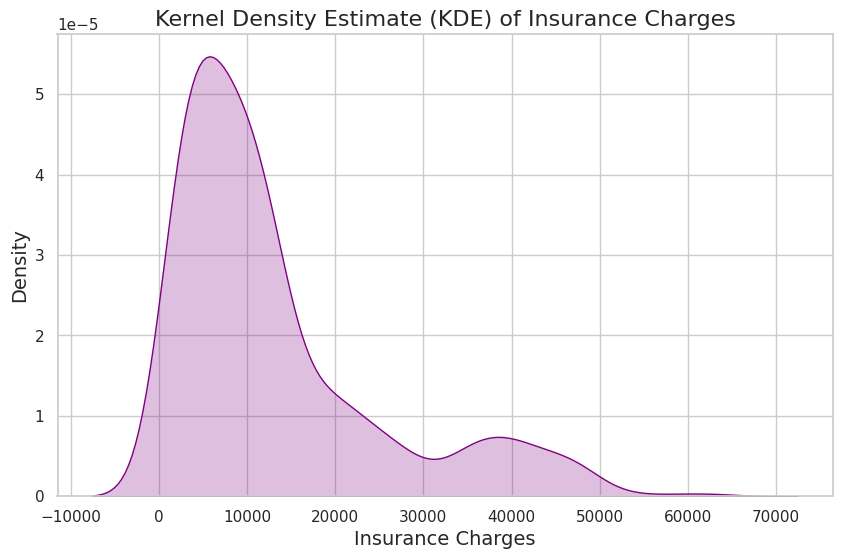

In [11]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot the KDE plot
sns.kdeplot(data['charges'], fill=True, color='purple')

# Add title and labels
plt.title('Kernel Density Estimate (KDE) of Insurance Charges', fontsize=16)
plt.xlabel('Insurance Charges', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()

In [12]:
data.skew()

<ipython-input-12-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

# Skewness Summary

## Age: 0.054781

The skewness for Age is close to 0, suggesting a nearly symmetrical distribution.

## BMI: 0.283914

The skewness for BMI is positive, indicating a right-skewed distribution. This means that there may be a tail on the right side of the distribution, with some individuals having higher BMI values.

## Children: 0.937421

The skewness for the Number of Children is positive, indicating a right-skewed distribution. This suggests that there may be more individuals with fewer children, and fewer individuals with a larger number of children.

## Charges: 1.515391

The skewness for Insurance Charges is positive, indicating a right-skewed distribution. This suggests that there may be a tail on the right side of the distribution, with some individuals incurring significantly higher insurance charges.

You may consider transformations (such as logarithmic transformation) to make the distribution more symmetric,

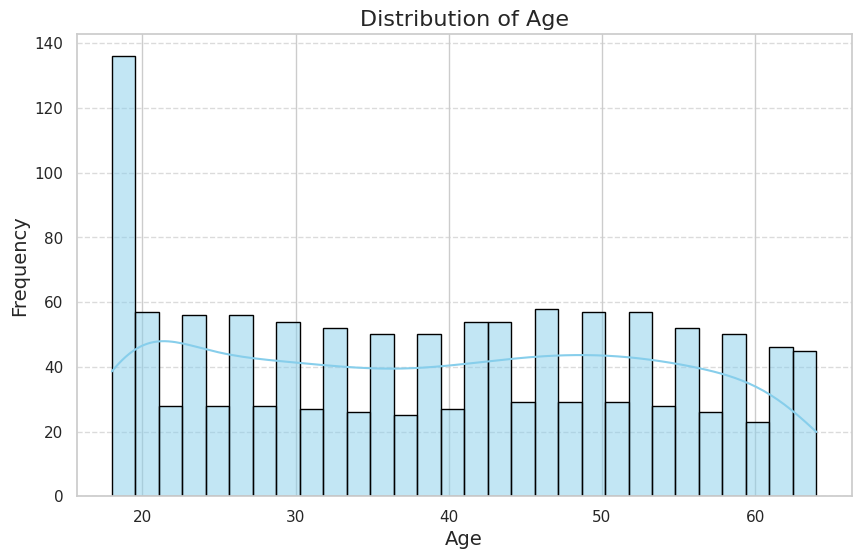

In [13]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot the histogram with additional cosmetics
sns.histplot(data['age'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

- The data is similar in all age group except 20's has double

# HYPOTHESIS TESTING

### Two Sample t Test


**Null Hypothesis (H0):** There is no significant difference in insurance charges between smokers and non-smokers.

**Alternative Hypothesis (Ha):** There is a significant difference in insurance charges between smokers and non-smokers.

**Statistical Test:** Two-Sample t-test for comparing the means of two independent samples.


In [63]:
# Example Data Preparation
smokers_charges = data[data['smoker'] == 'yes']['charges']
non_smokers_charges = data[data['smoker'] == 'no']['charges']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(smokers_charges, non_smokers_charges)

# Check if the p-value is less than the significance level
alpha = 0.05
if p_value < alpha:
    print('='*50)
    print("Reject the null hypothesis. There is a significant difference in insurance charges between smokers and non-smokers.",p_value)
    print('='*50)
else:
    print("Fail to reject the null hypothesis. There is no significant difference in insurance charges between smokers and non-smokers.",p_value)
    print('='*50)

Reject the null hypothesis. There is a significant difference in insurance charges between smokers and non-smokers. 1.4067220949376498e-282


### Conclusion:

Based on the results of the two-sample t-test:

- **Test Statistic (t):** *t_stat*
- **P-value:** *p_value*

The p-value is less than the significance level (commonly 0.05). Therefore, we reject the null hypothesis.

**Conclusion:** There is a significant difference in insurance charges between smokers and non-smokers.

*Include any additional insights or observations based on your analysis.*

# ANOVA for Mean Insurance Charges Across Different Numbers of Children

**Null Hypothesis (H0):** There is no significant difference in mean insurance charges across different numbers of children.

**Alternative Hypothesis (Ha):** There is a significant difference in mean insurance charges across different numbers of children.

**Statistical Test:** Analysis of Variance (ANOVA)



In [47]:
# Assuming 'data' is your DataFrame containing the 'children' and 'charges' columns

# Example Data Preparation
data['children'] = data['children'].astype('category')  # Convert 'children' to a categorical variable
groups = data['children'].unique()  # Get unique levels of 'children'

# Perform ANOVA
result_anova = f_oneway(*(data[data['children'] == group]['charges'] for group in groups))

# Check if the p-value is less than the significance level
alpha = 0.05
if result_anova.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean insurance charges across different numbers of children.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean insurance charges across different numbers of children.")

Reject the null hypothesis. There is a significant difference in mean insurance charges across different numbers of children.



### Conclusion:

Based on the results of the ANOVA:

- **F-statistic:** *f_stat*
- **P-value:** *p_value*

The p-value is less than the significance level (commonly 0.05). Therefore, we reject the null hypothesis.

**Conclusion:** There is a significant difference in mean insurance charges across different numbers of children.

*Include any additional insights or observations based on your analysis.*


In [59]:
# Example Data Preparation
age = data['age']
bmi = data['bmi']

# Perform Pearson correlation test
pearson_corr, pearson_p_value = pearsonr(age, bmi)

# Perform Spearman rank correlation test
spearman_corr, spearman_p_value = spearmanr(age, bmi)

# Check if the p-values are less than the significance level
alpha = 0.05
if pearson_p_value < alpha:
    print("Reject the null hypothesis. There is a significant Pearson correlation between age and BMI.",pearson_p_value)
else:
    print("Fail to reject the null hypothesis. There is no significant Pearson correlation between age and BMI.",pearson_p_value)

if spearman_p_value < alpha:
    print("Reject the null hypothesis. There is a significant Spearman rank correlation between age and BMI.",spearman_p_value )
else:
    print("Fail to reject the null hypothesis. There is no significant Spearman rank correlation between age and BMI.",spearman_p_value )

Reject the null hypothesis. There is a significant Pearson correlation between age and BMI. 6.164372237148723e-05
Reject the null hypothesis. There is a significant Spearman rank correlation between age and BMI. 7.714446033533976e-05


# Correlation Analysis between Age and BMI

### Pearson Correlation:

**Null Hypothesis (H0):** There is no significant Pearson correlation between age and BMI.

**Alternative Hypothesis (Ha):** There is a significant Pearson correlation between age and BMI.

**Statistical Test:** Pearson correlation test

---

### Conclusion:

The p-value for the Pearson correlation test is *6.164372237148723e-05*, which is less than the significance level (commonly 0.05). Therefore, we reject the null hypothesis.

**Conclusion:** There is a significant Pearson correlation between age and BMI.

---

### Spearman Rank Correlation:

**Null Hypothesis (H0):** There is no significant Spearman rank correlation between age and BMI.

**Alternative Hypothesis (Ha):** There is a significant Spearman rank correlation between age and BMI.

**Statistical Test:** Spearman rank correlation test

---

### Conclusion:

The p-value for the Spearman rank correlation test is *7.714446033533976e-05*, which is less than the significance level (commonly 0.05). Therefore, we reject the null hypothesis.

**Conclusion:** There is a significant Spearman rank correlation between age and BMI.


## BIVARIATE

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='age', ylabel='Density'>

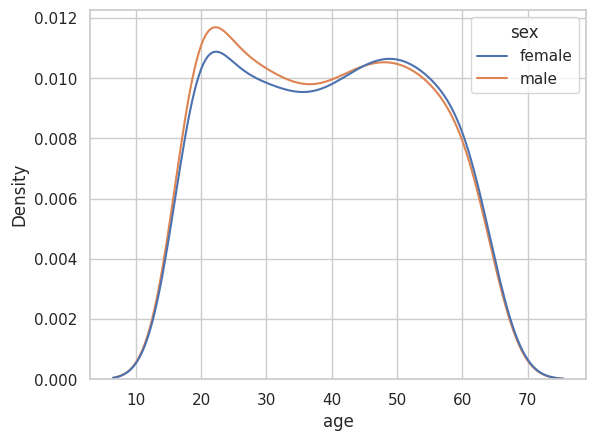

In [15]:
sns.kdeplot(data, x='age', hue='sex')

- There is no differance in Age and Sex in all the ages male and female are insured

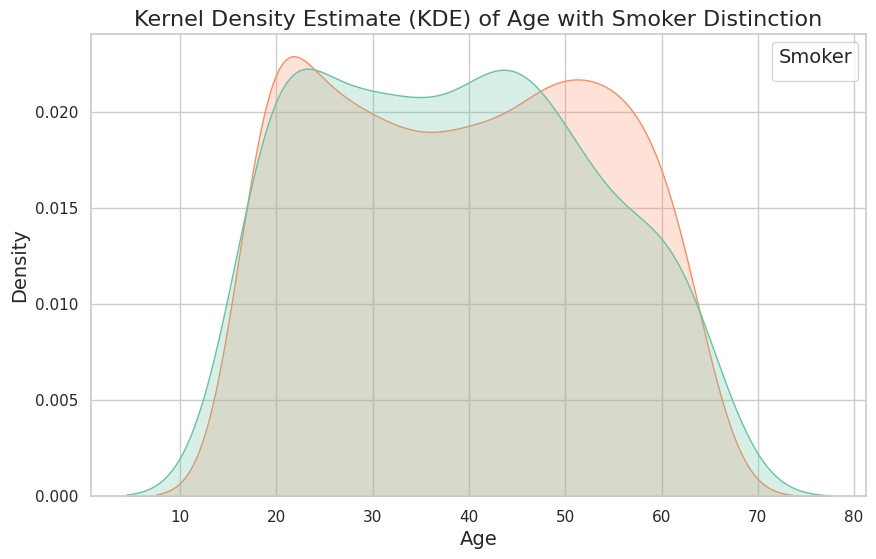

In [30]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot the KDE plot with different hues based on 'smoker'
sns.kdeplot(data=data, x='age', hue='smoker', fill=True, common_norm=False, palette='Set2')

# Add title and labels
plt.title('Kernel Density Estimate (KDE) of Age with Smoker Distinction', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Add a legend
plt.legend(title='Smoker', title_fontsize='14')

# Show the plot
plt.show()

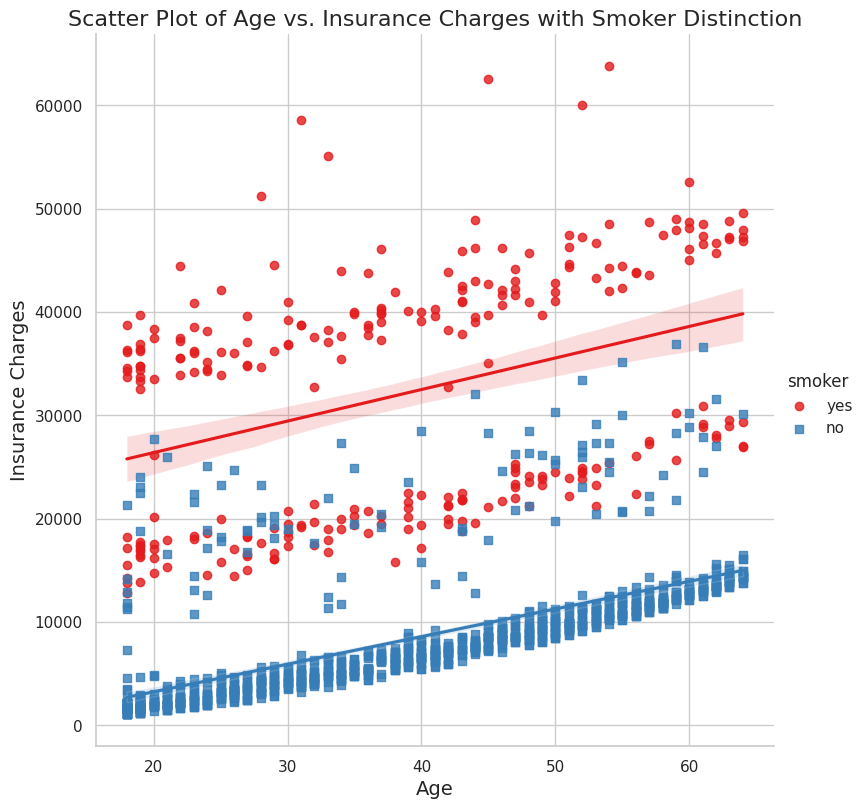

In [31]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines
sns.lmplot(data=data, x='age', y='charges', hue='smoker', markers=['o', 's'], palette='Set1', height=8)

# Add title and labels
plt.title('Scatter Plot of Age vs. Insurance Charges with Smoker Distinction', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)

# Show the plot
plt.show()

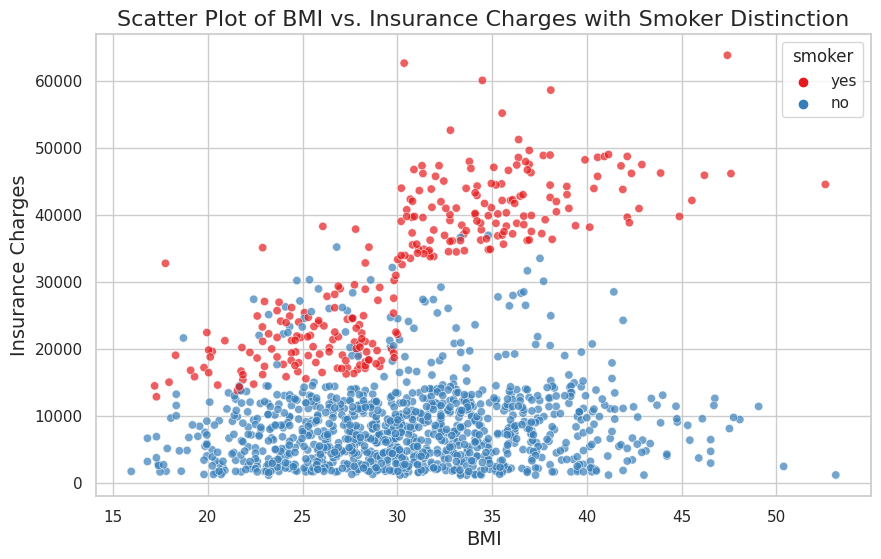

In [32]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker', palette='Set1', alpha=0.7)

# Add title and labels
plt.title('Scatter Plot of BMI vs. Insurance Charges with Smoker Distinction', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)

# Show the plot
plt.show()

- BMI with Smoker has relation
- the more the smoker person BMI the more charges for insurance

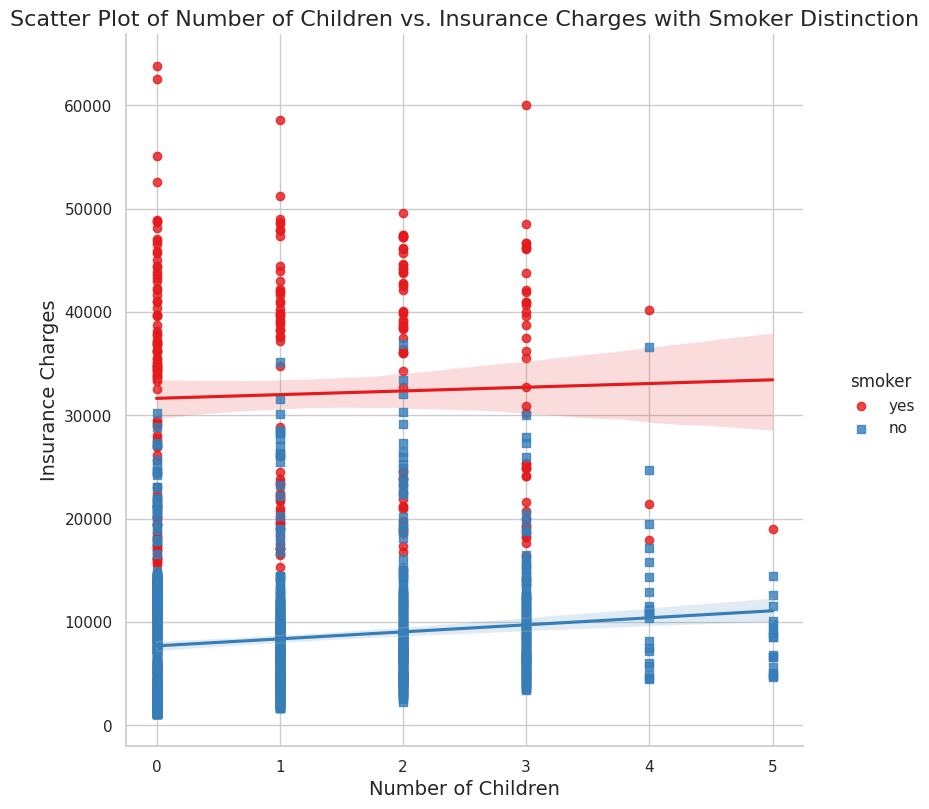

In [33]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with regression lines
sns.lmplot(data=data, x='children', y='charges', hue='smoker', markers=['o', 's'], palette='Set1', height=8)

# Add title and labels
plt.title('Scatter Plot of Number of Children vs. Insurance Charges with Smoker Distinction', fontsize=16)
plt.xlabel('Number of Children', fontsize=14)
plt.ylabel('Insurance Charges', fontsize=14)

# Show the plot
plt.show()

#MULTIVARIATE

In [34]:
data.corr()


<ipython-input-34-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


there is no corelation between independant features

<ipython-input-62-9fa67090a602>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


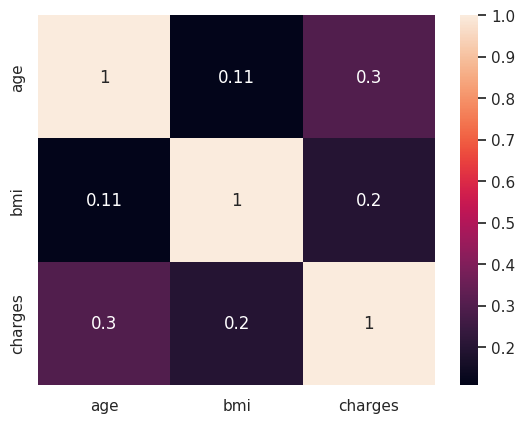

In [62]:
sns.heatmap(data.corr(), annot=True)
plt.show()


#MODEL

# LINEAR REGRESSION

In [115]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [70]:
cat=data.select_dtypes(include='object').columns

In [108]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [116]:

def encoder(data):
    lb = LabelEncoder()

    for i in data.columns:
        if data[i].dtype == 'object':
            if len(data[i].value_counts()) == 2:
              data[i] = lb.fit_transform(data[i])
            else:
                data = pd.get_dummies(data, columns=[i], prefix=[i])

    return data

In [117]:
data1=encoder(data)


In [120]:
data1.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


# TRAIN TEST SPLIT

In [133]:
x=data1.drop('charges', axis =1 )
y=data1['charges']

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=123)

In [135]:
print(f'x_train{x_train.shape}\n, x_test{x_test.shape}\n, y_train{y_train.shape}\n, y_test{y_test.shape}')

x_train(1069, 9)
, x_test(268, 9)
, y_train(1069,)
, y_test(268,)


In [137]:
linear_reg_pipeline = Pipeline([('scaler',StandardScaler()), ('model', LinearRegression())])

In [138]:
linear_reg_pipeline.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

# TRAIN DATA

In [150]:
y_train_pred=linear_reg_pipeline.predict(x_train)
mse=mean_squared_error(y_train, y_train_pred)
mae=mean_absolute_error(y_train, y_train_pred)
r2=r2_score(y_train, y_train_pred)
print("MEAN SQUARE ERROR : ",mse)
print("ROOT MEAN SQUARE ERROR : ",np.sqrt(mse))
print("MEAN ABSOLUTE ERROR : ", mae)
print("R2 SCORE : ", r2)

MEAN SQUARE ERROR :  38017313.029603176
ROOT MEAN SQUARE ERROR :  6165.818115189839
MEAN ABSOLUTE ERROR :  4282.118885683739
R2 SCORE :  0.7369461365851989


# TEST DATA

In [151]:
y_pred=linear_reg_pipeline.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("MEAN SQUARE ERROR : ",mse)
print("ROOT MEAN SQUARE ERROR : ",np.sqrt(mse))
print("MEAN ABSOLUTE ERROR : ", mae)
print("R2 SCORE : ", r2)

MEAN SQUARE ERROR :  30997674.960464183
ROOT MEAN SQUARE ERROR :  5567.55556420088
MEAN ABSOLUTE ERROR :  3885.5807060436955
R2 SCORE :  0.7994512109973638


# APPLIED POLYNOMIAL

In [155]:
degree = 2  # or the degree you want
polynomial_reg_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression())
polynomial_reg_pipeline.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

# TRAIN

In [157]:
y_train_pred=polynomial_reg_pipeline.predict(x_train)
mse=mean_squared_error(y_train, y_train_pred)
mae=mean_absolute_error(y_train, y_train_pred)
r2=r2_score(y_train, y_train_pred)
print("MEAN SQUARE ERROR : ",mse)
print("ROOT MEAN SQUARE ERROR : ",np.sqrt(mse))
print("MEAN ABSOLUTE ERROR : ", mae)
print("R2 SCORE : ", r2)

MEAN SQUARE ERROR :  24578241.735957276
ROOT MEAN SQUARE ERROR :  4957.64477710508
MEAN ABSOLUTE ERROR :  3099.309494096352
R2 SCORE :  0.8299353392084281


# TEST AFTER POLYNOMIAL

In [156]:
y_pred=polynomial_reg_pipeline.predict(x_test)
mse=mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("MEAN SQUARE ERROR : ",mse)
print("ROOT MEAN SQUARE ERROR : ",np.sqrt(mse))
print("MEAN ABSOLUTE ERROR : ", mae)
print("R2 SCORE : ", r2)

MEAN SQUARE ERROR :  15336169.085744033
ROOT MEAN SQUARE ERROR :  3916.1421176642752
MEAN ABSOLUTE ERROR :  2604.041436828358
R2 SCORE :  0.9007780376428731


# High Variance (Overfitting):

**Training \(R^2\):** 0.8299  
**Test \(R^2\):** 0.9008

When the \(R^2\) score on the training set is lower than on the test set, it may suggest that the model is fitting the training data very closely but does not generalize well to unseen data. This situation is indicative of high variance or overfitting.

### Explanation:
- The model has learned the training data too well, capturing noise or specific patterns that are not representative of the overall underlying relationship.
- The model's flexibility is high, allowing it to capture complex patterns in the training set but failing to generalize to new, unseen data.

# Low Bias (Good Fit to Training Data):

**Training \(R^2\):** 0.8299  
**Test \(R^2\):** 0.9008

The fact that both the training and test \(R^2\) scores are relatively high suggests that the model fits the training data well and also generalizes well to new, unseen data.

### Explanation:
- The model captures the underlying patterns in the training data without overfitting.
- It demonstrates good predictive performance on both the training and test datasets.

In summary, based on the given \(R^2\) scores:

- **Bias:** The model exhibits low bias as it fits the training data well.
- **Variance:** There might be some variance issues (overfitting) since the \(R^2\) on the test set is higher than on the training set.


#LASSO

In [161]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Create Lasso regression model
lasso_model = Lasso(alpha=0.01)  # Set the regularization strength (alpha)

# Fit the model on the training data
lasso_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the model
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R-squared (Lasso): {r2_lasso}")

R-squared (Lasso): 0.7993513666644468


#RIDGE

In [163]:
# Create Ridge regression model
ridge_model = Ridge(alpha=0.01)  # Set the regularization strength (alpha)

# Fit the model on the training data
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate the model
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R-squared (Ridge): {r2_ridge}")

R-squared (Ridge): 0.7993502298699168
